In [ ]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib    
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)
from plotnine import *
from tqdm.notebook import tqdm

### 자전거 운영 이력csv파일을 불러 온다.

In [ ]:
## 운영 이력 및 바이크 Bike_Station 현황 분석 폴더에서 이용 시간을 구해준 01.운영 이력(Bike_Time(s).csv 파일를 로드한다.
df_OH = pd.read_csv('01.운영이력.csv')

In [ ]:
# 각 년도별 월별 현황을 알아보기 위해 Columns LEAS_DATE,RTN_DATE의 컬럼 내용을 변경해 준다.
df_OH['LEAS_DATE']=df_OH['LEAS_DATE'].apply(lambda x : x[:7]) 
df_OH['RTN_DATE']=df_OH['RTN_DATE'].apply(lambda x : x[:7]) 

In [ ]:
df_OH

,LEAS_NO,LEAS_STAT,LEAS_DATE,LEAS_STATION,LEAS_DEF_NO,RTN_DATE,RTN_STATION,RTN_DEF_NO,TRNV_QTY,MEMB_DIV,MEMB_NO,TEMP_MEMB_NO,BIKE_TAG,RTN_PROCESS
0,15945541,2,2017-01,213,18,2017-01,260,17,0.0,6,164203,0.0,1A844000000BB7,NaN
1,15945542,2,2017-01,231,4,2017-01,231,17,31039.0,1,187551,0.0,1A844000000494,NaN
2,15945543,2,2017-01,119,14,2017-01,0,0,NaN,12,168994,0.0,1A844000000533,1.0
3,15945544,2,2017-01,121,17,2017-01,133,14,15490.0,12,183971,0.0,1A844000000731,NaN
4,15945545,2,2017-01,320,29,2017-01,259,27,0.0,12,167475,0.0,1A84400000F343,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3142683,21718608,2,2019-12,222,16,2019-12,219,24,0.0,3,236957,0.0,1A84400000F881,NaN
3142684,21718610,2,2019-12,343,14,2019-12,311,15,0.0,99,0,4124665.0,1A84400000F9DA,NaN
3142685,21718611,2,2019-12,333,17,2020-01,322,5,0.0,99,0,4124667.0,1A84400000048B,NaN
3142686,21718613,2,2019-12,264,4,2020-01,210,13,0.0,12,180671,0.0,1A84400000F804,NaN


In [ ]:
# 필요한 컬럼들만 뽑아 df_OH_Mon로 만든다.
df_OH_Mon = df_OH[['LEAS_DATE','LEAS_STATION','RTN_DATE','RTN_STATION','TRNV_QTY','MEMB_NO','TEMP_MEMB_NO']]

In [ ]:
df_OH_Mon_Mem = df_OH_Mon[df_OH_Mon['MEMB_NO']!=0] # 회원들만 뽑아내준다.

In [ ]:
df_OH_Mon_Mem # 총 회원이 이용한 3년간의 자전거 이용 현황은 2350299번 이다.

,LEAS_DATE,LEAS_STATION,RTN_DATE,RTN_STATION,TRNV_QTY,MEMB_NO,TEMP_MEMB_NO
0,2017-01,213,2017-01,260,0.0,164203,0.0
1,2017-01,231,2017-01,231,31039.0,187551,0.0
2,2017-01,119,2017-01,0,NaN,168994,0.0
3,2017-01,121,2017-01,133,15490.0,183971,0.0
4,2017-01,320,2017-01,259,0.0,167475,0.0
...,...,...,...,...,...,...,...
3142681,2019-12,309,2019-12,343,0.0,26784,0.0
3142682,2019-12,210,2020-01,316,0.0,235729,0.0
3142683,2019-12,222,2019-12,219,0.0,236957,0.0
3142686,2019-12,264,2020-01,210,0.0,180671,0.0


In [ ]:
df_OH_Mon_NonMem = df_OH_Mon[df_OH_Mon['MEMB_NO']==0] # 회원이 아닌 분이 이용한 3년간의 자전거 현황은 792389번 이다.
df_OH_Mon_NonMem 

,LEAS_DATE,LEAS_STATION,RTN_DATE,RTN_STATION,TRNV_QTY,MEMB_NO,TEMP_MEMB_NO
5,2017-01,309,2017-01,210,0.0,0,3185081.0
6,2017-01,232,2017-01,213,8948.0,0,3185082.0
13,2017-01,234,2017-01,259,0.0,0,3185083.0
15,2017-01,237,2017-01,234,20892.0,0,3185084.0
16,2017-01,144,2017-01,125,16127.0,0,3185085.0
...,...,...,...,...,...,...,...
3142676,2019-12,309,2019-12,311,0.0,0,4124661.0
3142677,2019-12,309,2019-12,311,0.0,0,4124662.0
3142680,2019-12,228,2020-01,0,NaN,0,4124664.0
3142684,2019-12,343,2019-12,311,0.0,0,4124665.0


### 월별 전체, 회원, 비회원들의 자전거 이용 횟수

In [ ]:
month = df_OH_Mon_Mem['LEAS_DATE'].unique().tolist()

In [ ]:
Mon_use_station_Count = [] # 전체 인원
for i in tqdm(month):
    Mon_use_station_Count.append((df_OH_Mon['LEAS_DATE'] == i).sum())

In [ ]:
Mon_use_station_Men_Count = [] # 회원
for i in tqdm(month):
    Mon_use_station_Men_Count.append((df_OH_Mon_Mem['LEAS_DATE'] == i).sum())

In [ ]:
Mon_use_station_NonMen_Count = [] # 회원
for i in tqdm(month):
    Mon_use_station_NonMen_Count.append((df_OH_Mon_NonMem['LEAS_DATE'] == i).sum())

#### 3년간 자전거 이용 횟수 및 시각화
- 2017년
- 2018년
- 2019년

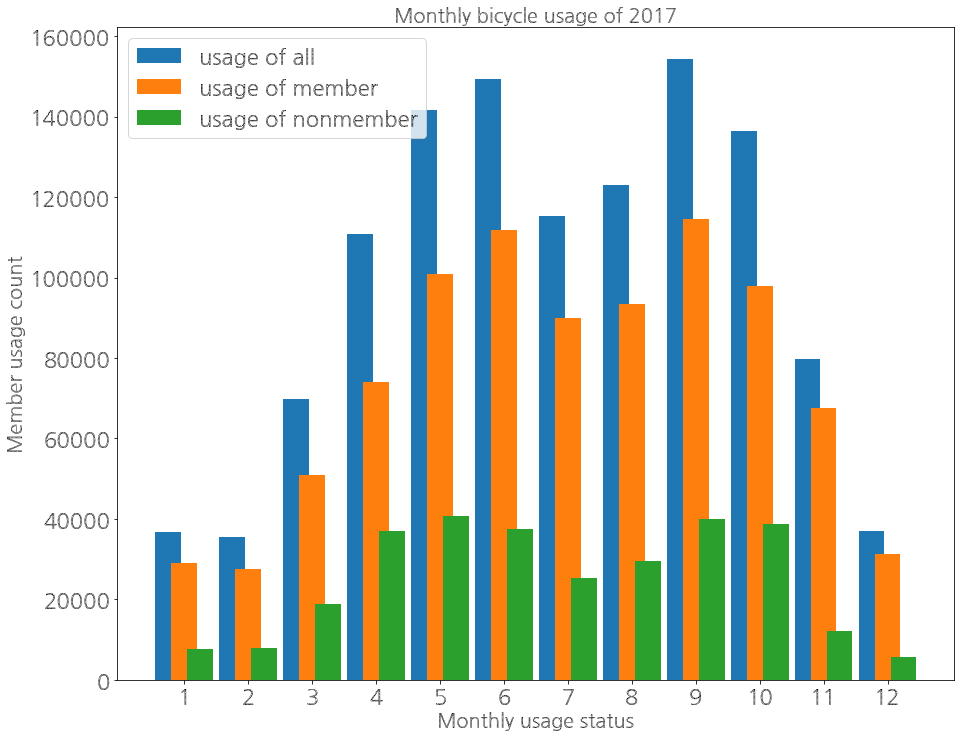

In [ ]:
## 2017년 전체/회원/비회원 시간별 이용 현황 

plt.figure(figsize=(15, 12))
x = ["{}".format(i + 1) for i in range(12)]
y_a = [i for i in Mon_use_station_Count[:12]]
y_b = [i for i in Mon_use_station_Men_Count[:12]]
y_c =  [i for i in Mon_use_station_NonMen_Count[:12]]

plt.bar([i * 2 for i in range(len(x))], y_a, label='usage of all') # 전체
plt.bar([i * 2 + 0.5 for i in range(len(x))], y_b, label='usage of member') #회원
plt.bar([i * 2 + 1 for i in range(len(x))], y_c, label='usage of nonmember') #비회원
plt.xticks([i * 2 + 0.5 for i in range(len(x))], x)

plt.xlabel('Monthly usage status',fontsize=20)
plt.ylabel('Member usage count',fontsize=20)
plt.title('Monthly bicycle usage of 2017',fontsize=20)


plt.legend()
# plt.show()
plt.savefig('/content/drive/My Drive/compas/준수씨 자전거 자료/compas_final(code정리 진행중)/회원 이용 분석/Monthly bicycle usage of 2017')

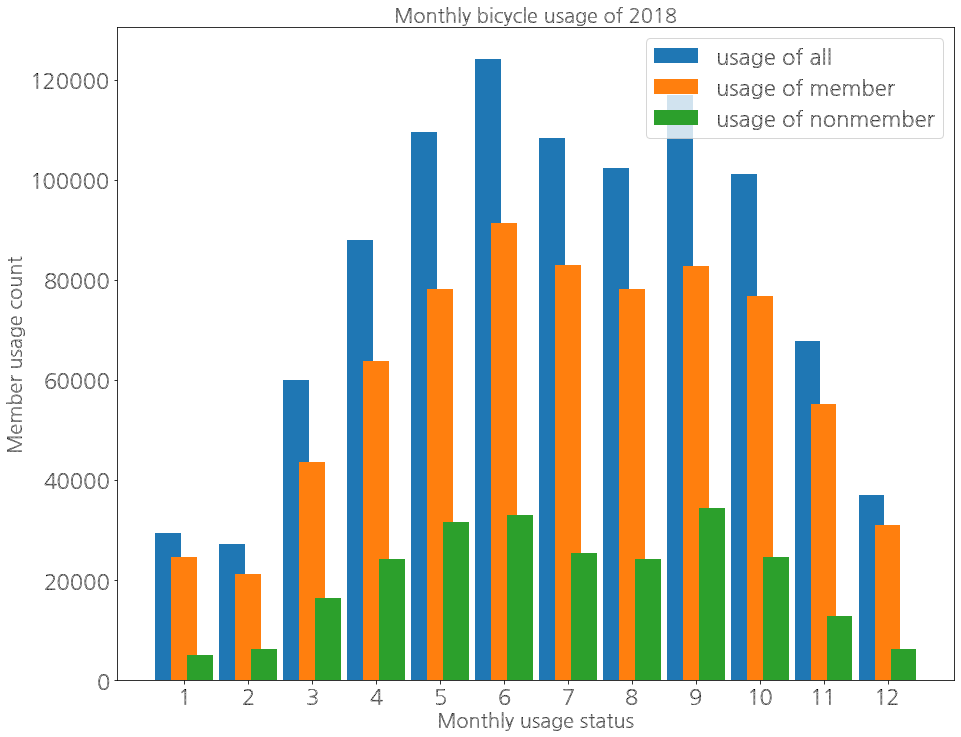

In [ ]:
## 2018년 전체/회원/비회원 시간별 이용 현황 

plt.figure(figsize=(15, 12))
x = ["{}".format(i + 1) for i in range(12)]
y_a = [i for i in Mon_use_station_Count[12:24]]
y_b = [i for i in Mon_use_station_Men_Count[12:24]]
y_c =  [i for i in Mon_use_station_NonMen_Count[12:24]]

plt.bar([i * 2 for i in range(len(x))], y_a, label='usage of all') # 전체
plt.bar([i * 2 + 0.5 for i in range(len(x))], y_b, label='usage of member') #회원
plt.bar([i * 2 + 1 for i in range(len(x))], y_c, label='usage of nonmember') #비회원
plt.xticks([i * 2 + 0.5 for i in range(len(x))], x)

plt.xlabel('Monthly usage status',fontsize=20)
plt.ylabel('Member usage count',fontsize=20)
plt.title('Monthly bicycle usage of 2018',fontsize=20)


plt.legend()
# plt.show()
plt.savefig('/content/drive/My Drive/compas/준수씨 자전거 자료/compas_final(code정리 진행중)/회원 이용 분석/Monthly bicycle usage of 2018')

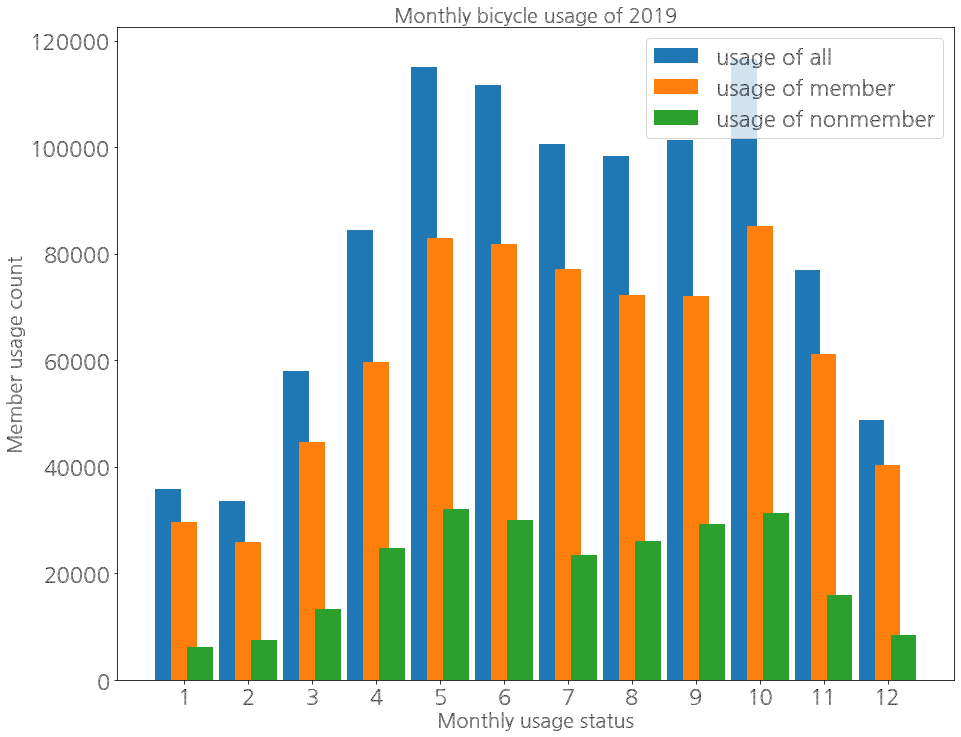

In [ ]:
## 2019년 전체/회원/비회원 시간별 이용 현황 

plt.figure(figsize=(15, 12))
x = ["{}".format(i + 1) for i in range(12)]
y_a = [i for i in Mon_use_station_Count[24:]] 
y_b = [i for i in Mon_use_station_Men_Count[24:]]
y_c =  [i for i in Mon_use_station_NonMen_Count[24:]]

plt.bar([i * 2 for i in range(len(x))], y_a, label='usage of all') # 전체
plt.bar([i * 2 + 0.5 for i in range(len(x))], y_b, label='usage of member') #회원
plt.bar([i * 2 + 1 for i in range(len(x))], y_c, label='usage of nonmember') #비회원
plt.xticks([i * 2 + 0.5 for i in range(len(x))], x)

plt.xlabel('Monthly usage status',fontsize=20)
plt.ylabel('Member usage count',fontsize=20)
plt.title('Monthly bicycle usage of 2019',fontsize=20)


plt.legend()
# plt.show()
plt.savefig('/content/drive/My Drive/compas/준수씨 자전거 자료/compas_final(code정리 진행중)/회원 이용 분석/Monthly bicycle usage of 2019')

### 회원 증가 추세 조사

In [ ]:
Mon_use_station_all = []
for i in month:
    Mon_use_station_all.append(df_OH_Mon_Mem[df_OH_Mon_Mem['LEAS_DATE'] == i]['MEMB_NO'].unique().tolist())

In [ ]:
a = Mon_use_station_all # 간편하게 변경하기 위해 list이름 변경

In [ ]:
def s(a): # set로 변경 - 정확히 몇명의 회원이 추가되는지 알기 위해서 set함수를 사용해준다.
    b =set(a)
    return b   

In [ ]:
# 기존 회원수에서 새로운 이 추가되는 수만큼 빼준다.
y17_2 = s(a[1]) - s(a[0])
y17_3 = s(a[2]) - s(a[0]).union(s(a[1]))
y17_4 = s(a[3]) - s(a[0]).union(s(a[1]),s(a[2]))
y17_5 = s(a[4]) - s(a[0]).union(s(a[1]),s(a[2]),s(a[3]))
y17_6 = s(a[5]) - s(a[0]).union(s(a[1]),s(a[2]),s(a[3]),s(a[4]))
y17_7 = s(a[6]) - s(a[0]).union(s(a[1]),s(a[2]),s(a[3]),s(a[4]),s(a[5]))
y17_8 = s(a[7]) - s(a[0]).union(s(a[1]),s(a[2]),s(a[3]),s(a[4]),s(a[5]),s(a[6]))
y17_9 = s(a[8]) - s(a[0]).union(s(a[1]),s(a[2]),s(a[3]),s(a[4]),s(a[5]),s(a[6]),s(a[7]))
y17_10 = s(a[9]) - s(a[0]).union(s(a[1]),s(a[2]),s(a[3]),s(a[4]),s(a[5]),s(a[6]),s(a[7]),s(a[8]))
y17_11 = s(a[10]) - s(a[0]).union(s(a[1]),s(a[2]),s(a[3]),s(a[4]),s(a[5]),s(a[6]),s(a[7]),s(a[8]),s(a[9]))
y17_12 = s(a[11]) - s(a[0]).union(s(a[1]),s(a[2]),s(a[3]),s(a[4]),s(a[5]),s(a[6]),s(a[7]),s(a[8]),s(a[9]),s(a[10]))
y18_1 = s(a[12]) - s(a[0]).union(s(a[1]),s(a[2]),s(a[3]),s(a[4]),s(a[5]),s(a[6]),s(a[7]),s(a[8]),s(a[9]),s(a[10]),s(a[11]))
y18_2 = s(a[13]) - s(a[0]).union(s(a[1]),s(a[2]),s(a[3]),s(a[4]),s(a[5]),s(a[6]),s(a[7]),s(a[8]),s(a[9]),s(a[10]),s(a[11]),s(a[12]))
y18_3 = s(a[14]) - s(a[0]).union(s(a[1]),s(a[2]),s(a[3]),s(a[4]),s(a[5]),s(a[6]),s(a[7]),s(a[8]),s(a[9]),s(a[10]),s(a[11]),s(a[12]),s(a[13]))
y18_4 = s(a[15]) - s(a[0]).union(s(a[1]),s(a[2]),s(a[3]),s(a[4]),s(a[5]),s(a[6]),s(a[7]),s(a[8]),s(a[9]),s(a[10]),s(a[11]),s(a[12]),s(a[13]),s(a[14]))
y18_5 = s(a[16]) - s(a[0]).union(s(a[1]),s(a[2]),s(a[3]),s(a[4]),s(a[5]),s(a[6]),s(a[7]),s(a[8]),s(a[9]),s(a[10]),s(a[11]),s(a[12]),s(a[13]),s(a[14]),s(a[15]))
y18_6 = s(a[17]) - s(a[0]).union(s(a[1]),s(a[2]),s(a[3]),s(a[4]),s(a[5]),s(a[6]),s(a[7]),s(a[8]),s(a[9]),s(a[10]),s(a[11]),s(a[12]),s(a[13]),s(a[14]),s(a[15]),s(a[16]))
y18_7 = s(a[18]) - s(a[0]).union(s(a[1]),s(a[2]),s(a[3]),s(a[4]),s(a[5]),s(a[6]),s(a[7]),s(a[8]),s(a[9]),s(a[10]),s(a[11]),s(a[12]),s(a[13]),s(a[14]),s(a[15]),s(a[16]),s(a[17]))
y18_8 = s(a[19]) - s(a[0]).union(s(a[1]),s(a[2]),s(a[3]),s(a[4]),s(a[5]),s(a[6]),s(a[7]),s(a[8]),s(a[9]),s(a[10]),s(a[11]),s(a[12]),s(a[13]),s(a[14]),s(a[15]),s(a[16]),s(a[17]),s(a[18]))
y18_9 = s(a[20]) - s(a[0]).union(s(a[1]),s(a[2]),s(a[3]),s(a[4]),s(a[5]),s(a[6]),s(a[7]),s(a[8]),s(a[9]),s(a[10]),s(a[11]),s(a[12]),s(a[13]),s(a[14]),s(a[15]),s(a[16]),s(a[17]),s(a[18]),s(a[19]))
y18_10 = s(a[21]) - s(a[0]).union(s(a[1]),s(a[2]),s(a[3]),s(a[4]),s(a[5]),s(a[6]),s(a[7]),s(a[8]),s(a[9]),s(a[10]),s(a[11]),s(a[12]),s(a[13]),s(a[14]),s(a[15]),s(a[16]),s(a[17]),s(a[18]),s(a[19]),s(a[20]))
y18_11 = s(a[22]) - s(a[0]).union(s(a[1]),s(a[2]),s(a[3]),s(a[4]),s(a[5]),s(a[6]),s(a[7]),s(a[8]),s(a[9]),s(a[10]),s(a[11]),s(a[12]),s(a[13]),s(a[14]),s(a[15]),s(a[16]),s(a[17]),s(a[18]),s(a[19]),s(a[20]),s(a[21]))
y18_12 = s(a[23]) - s(a[0]).union(s(a[1]),s(a[2]),s(a[3]),s(a[4]),s(a[5]),s(a[6]),s(a[7]),s(a[8]),s(a[9]),s(a[10]),s(a[11]),s(a[12]),s(a[13]),s(a[14]),s(a[15]),s(a[16]),s(a[17]),s(a[18]),s(a[19]),s(a[20]),s(a[21]),s(a[22]))
y19_1 = s(a[24]) - s(a[0]).union(s(a[1]),s(a[2]),s(a[3]),s(a[4]),s(a[5]),s(a[6]),s(a[7]),s(a[8]),s(a[9]),s(a[10]),s(a[11]),s(a[12]),s(a[13]),s(a[14]),s(a[15]),s(a[16]),s(a[17]),s(a[18]),s(a[19]),s(a[20]),s(a[21]),s(a[22]),s(a[23]))
y19_2 = s(a[25]) - s(a[0]).union(s(a[1]),s(a[2]),s(a[3]),s(a[4]),s(a[5]),s(a[6]),s(a[7]),s(a[8]),s(a[9]),s(a[10]),s(a[11]),s(a[12]),s(a[13]),s(a[14]),s(a[15]),s(a[16]),s(a[17]),s(a[18]),s(a[19]),s(a[20]),s(a[21]),s(a[22]),s(a[23]),s(a[24]))
y19_3 = s(a[26]) - s(a[0]).union(s(a[1]),s(a[2]),s(a[3]),s(a[4]),s(a[5]),s(a[6]),s(a[7]),s(a[8]),s(a[9]),s(a[10]),s(a[11]),s(a[12]),s(a[13]),s(a[14]),s(a[15]),s(a[16]),s(a[17]),s(a[18]),s(a[19]),s(a[20]),s(a[21]),s(a[22]),s(a[23]),s(a[24]),s(a[25]))
y19_4 = s(a[27]) - s(a[0]).union(s(a[1]),s(a[2]),s(a[3]),s(a[4]),s(a[5]),s(a[6]),s(a[7]),s(a[8]),s(a[9]),s(a[10]),s(a[11]),s(a[12]),s(a[13]),s(a[14]),s(a[15]),s(a[16]),s(a[17]),s(a[18]),s(a[19]),s(a[20]),s(a[21]),s(a[22]),s(a[23]),s(a[24]),s(a[25]),s(a[26]))
y19_5 = s(a[28]) - s(a[0]).union(s(a[1]),s(a[2]),s(a[3]),s(a[4]),s(a[5]),s(a[6]),s(a[7]),s(a[8]),s(a[9]),s(a[10]),s(a[11]),s(a[12]),s(a[13]),s(a[14]),s(a[15]),s(a[16]),s(a[17]),s(a[18]),s(a[19]),s(a[20]),s(a[21]),s(a[22]),s(a[23]),s(a[24]),s(a[25]),s(a[26]),s(a[27]))
y19_6 = s(a[29]) - s(a[0]).union(s(a[1]),s(a[2]),s(a[3]),s(a[4]),s(a[5]),s(a[6]),s(a[7]),s(a[8]),s(a[9]),s(a[10]),s(a[11]),s(a[12]),s(a[13]),s(a[14]),s(a[15]),s(a[16]),s(a[17]),s(a[18]),s(a[19]),s(a[20]),s(a[21]),s(a[22]),s(a[23]),s(a[24]),s(a[25]),s(a[26]),s(a[27]),s(a[28]))
y19_7 = s(a[30]) - s(a[0]).union(s(a[1]),s(a[2]),s(a[3]),s(a[4]),s(a[5]),s(a[6]),s(a[7]),s(a[8]),s(a[9]),s(a[10]),s(a[11]),s(a[12]),s(a[13]),s(a[14]),s(a[15]),s(a[16]),s(a[17]),s(a[18]),s(a[19]),s(a[20]),s(a[21]),s(a[22]),s(a[23]),s(a[24]),s(a[25]),s(a[26]),s(a[27]),s(a[28]),s(a[29]))
y19_8 = s(a[31]) - s(a[0]).union(s(a[1]),s(a[2]),s(a[3]),s(a[4]),s(a[5]),s(a[6]),s(a[7]),s(a[8]),s(a[9]),s(a[10]),s(a[11]),s(a[12]),s(a[13]),s(a[14]),s(a[15]),s(a[16]),s(a[17]),s(a[18]),s(a[19]),s(a[20]),s(a[21]),s(a[22]),s(a[23]),s(a[24]),s(a[25]),s(a[26]),s(a[27]),s(a[28]),s(a[29]),s(a[30]))
y19_9 = s(a[32]) - s(a[0]).union(s(a[1]),s(a[2]),s(a[3]),s(a[4]),s(a[5]),s(a[6]),s(a[7]),s(a[8]),s(a[9]),s(a[10]),s(a[11]),s(a[12]),s(a[13]),s(a[14]),s(a[15]),s(a[16]),s(a[17]),s(a[18]),s(a[19]),s(a[20]),s(a[21]),s(a[22]),s(a[23]),s(a[24]),s(a[25]),s(a[26]),s(a[27]),s(a[28]),s(a[29]),s(a[30]),s(a[31]))
y19_10 = s(a[33]) - s(a[0]).union(s(a[1]),s(a[2]),s(a[3]),s(a[4]),s(a[5]),s(a[6]),s(a[7]),s(a[8]),s(a[9]),s(a[10]),s(a[11]),s(a[12]),s(a[13]),s(a[14]),s(a[15]),s(a[16]),s(a[17]),s(a[18]),s(a[19]),s(a[20]),s(a[21]),s(a[22]),s(a[23]),s(a[24]),s(a[25]),s(a[26]),s(a[27]),s(a[28]),s(a[29]),s(a[30]),s(a[31]),s(a[32]))
y19_11 = s(a[34]) - s(a[0]).union(s(a[1]),s(a[2]),s(a[3]),s(a[4]),s(a[5]),s(a[6]),s(a[7]),s(a[8]),s(a[9]),s(a[10]),s(a[11]),s(a[12]),s(a[13]),s(a[14]),s(a[15]),s(a[16]),s(a[17]),s(a[18]),s(a[19]),s(a[20]),s(a[21]),s(a[22]),s(a[23]),s(a[24]),s(a[25]),s(a[26]),s(a[27]),s(a[28]),s(a[29]),s(a[30]),s(a[31]),s(a[32]),s(a[33]))
y19_12 = s(a[35]) - s(a[0]).union(s(a[1]),s(a[2]),s(a[3]),s(a[4]),s(a[5]),s(a[6]),s(a[7]),s(a[8]),s(a[9]),s(a[10]),s(a[11]),s(a[12]),s(a[13]),s(a[14]),s(a[15]),s(a[16]),s(a[17]),s(a[18]),s(a[19]),s(a[20]),s(a[21]),s(a[22]),s(a[23]),s(a[24]),s(a[25]),s(a[26]),s(a[27]),s(a[28]),s(a[29]),s(a[30]),s(a[31]),s(a[32]),s(a[33]),s(a[34]))

In [ ]:
print('2017년 2월 회원수 증가:', len(y17_2))
print('2017년 3월 회원수 증가:', len(y17_3))
print('2017년 4월 회원수 증가:', len(y17_4))
print('2017년 5월 회원수 증가:', len(y17_5))
print('2017년 6월 회원수 증가:', len(y17_6))
print('2017년 7월 회원수 증가:', len(y17_7))
print('2017년 8월 회원수 증가:', len(y17_8))
print('2017년 9월 회원수 증가:', len(y17_9))
print('2017년 10월 회원수 증가:', len(y17_10))
print('2017년 11월 회원수 증가:', len(y17_11))
print('2017년 12월 회원수 증가:', len(y17_12))
print('2018년 1월 회원수 증가:', len(y18_1))
print('2018년 2월 회원수 증가:', len(y18_2))
print('2018년 3월 회원수 증가:', len(y18_3))
print('2018년 4월 회원수 증가:', len(y18_4))
print('2018년 5월 회원수 증가:', len(y18_5))
print('2018년 6월 회원수 증가:', len(y18_6))
print('2018년 7월 회원수 증가:', len(y18_7))
print('2018년 8월 회원수 증가:', len(y18_8))
print('2018년 9월 회원수 증가:', len(y18_9))
print('2018년 10월 회원수 증가:', len(y18_10))
print('2018년 11월 회원수 증가:', len(y18_11))
print('2018년 12월 회원수 증가:', len(y18_12))
print('2019년 1월 회원수 증가:', len(y19_1))
print('2019년 2월 회원수 증가:', len(y19_2))
print('2019년 3월 회원수 증가:', len(y19_3))
print('2019년 4월 회원수 증가:', len(y19_4))
print('2019년 5월 회원수 증가:', len(y19_5))
print('2019년 6월 회원수 증가:', len(y19_6))
print('2019년 7월 회원수 증가:', len(y19_7))
print('2019년 8월 회원수 증가:', len(y19_8))
print('2019년 9월 회원수 증가:', len(y19_9))
print('2019년 10월 회원수 증가:', len(y19_10))
print('2019년 11월 회원수 증가:', len(y19_11))
print('2019년 12월 회원수 증가:', len(y19_12))

2017년 2월 회원수 증가: 612
2017년 3월 회원수 증가: 1325
2017년 4월 회원수 증가: 1966
2017년 5월 회원수 증가: 1903
2017년 6월 회원수 증가: 1837
2017년 7월 회원수 증가: 1274
2017년 8월 회원수 증가: 1407
2017년 9월 회원수 증가: 1717
2017년 10월 회원수 증가: 1202
2017년 11월 회원수 증가: 548
2017년 12월 회원수 증가: 178
2018년 1월 회원수 증가: 199
2018년 2월 회원수 증가: 250
2018년 3월 회원수 증가: 893
2018년 4월 회원수 증가: 1437
2018년 5월 회원수 증가: 1442
2018년 6월 회원수 증가: 1410
2018년 7월 회원수 증가: 1246
2018년 8월 회원수 증가: 1095
2018년 9월 회원수 증가: 1506
2018년 10월 회원수 증가: 1037
2018년 11월 회원수 증가: 489
2018년 12월 회원수 증가: 231
2019년 1월 회원수 증가: 274
2019년 2월 회원수 증가: 348
2019년 3월 회원수 증가: 739
2019년 4월 회원수 증가: 1190
2019년 5월 회원수 증가: 1537
2019년 6월 회원수 증가: 1448
2019년 7월 회원수 증가: 1245
2019년 8월 회원수 증가: 1325
2019년 9월 회원수 증가: 1297
2019년 10월 회원수 증가: 1182
2019년 11월 회원수 증가: 631
2019년 12월 회원수 증가: 355


In [ ]:
increase_mem_17 = [0,len(y17_2),len(y17_3),len(y17_4),len(y17_5),len(y17_6),len(y17_7),len(y17_8),len(y17_9),len(y17_10),len(y17_11),len(y17_12)]
increase_mem_18 = [len(y18_1),len(y18_2),len(y18_3),len(y18_4),len(y18_5),len(y18_6),len(y18_7),len(y18_8),len(y18_9),len(y18_10),len(y18_11),len(y18_12)]
increase_mem_19 = [len(y19_1),len(y19_2),len(y19_3),len(y19_4),len(y19_5),len(y19_6),len(y19_7),len(y19_8),len(y19_9),len(y19_10),len(y19_11),len(y19_12)]
df_increase_mem_17 = pd.DataFrame(increase_mem_17,  columns=['증가한 회원 수'])
df_increase_mem_18 = pd.DataFrame(increase_mem_18,  columns=['증가한 회원 수'])
df_increase_mem_19 = pd.DataFrame(increase_mem_19,  columns=['증가한 회원 수'])
df_mem_total = pd.concat([df_increase_mem_17,df_increase_mem_18,df_increase_mem_19],axis=0)
df_mem_total

,증가한 회원 수
0,0
1,612
2,1325
3,1966
4,1903
5,1837
6,1274
7,1407
8,1717
9,1202


In [ ]:
m_2017 = []
m_2018 = []
m_2019 = []
for i in range(12):
    m_2017.append('2017년 {}월 회원수 증가'.format(i+1))
    m_2018.append('2018년 {}월 회원수 증가'.format(i+1))
    m_2019.append('2019년 {}월 회원수 증가'.format(i+1))

In [ ]:
df_2017 = pd.DataFrame(m_2017,  columns=['월'])
df_2018 = pd.DataFrame(m_2018,  columns=['월'])
df_2019 = pd.DataFrame(m_2019,  columns=['월'])
df_month = pd.concat([df_2017,df_2018,df_2019],axis=0)
df_month

,월
0,2017년 1월 회원수 증가
1,2017년 2월 회원수 증가
2,2017년 3월 회원수 증가
3,2017년 4월 회원수 증가
4,2017년 5월 회원수 증가
5,2017년 6월 회원수 증가
6,2017년 7월 회원수 증가
7,2017년 8월 회원수 증가
8,2017년 9월 회원수 증가
9,2017년 10월 회원수 증가


In [ ]:
df_increase_3year_Mem = pd.concat([df_month,df_mem_total],axis=1)
df_increase_3year_Mem

,월,증가한 회원 수
0,2017년 1월 회원수 증가,0
1,2017년 2월 회원수 증가,612
2,2017년 3월 회원수 증가,1325
3,2017년 4월 회원수 증가,1966
4,2017년 5월 회원수 증가,1903
5,2017년 6월 회원수 증가,1837
6,2017년 7월 회원수 증가,1274
7,2017년 8월 회원수 증가,1407
8,2017년 9월 회원수 증가,1717
9,2017년 10월 회원수 증가,1202


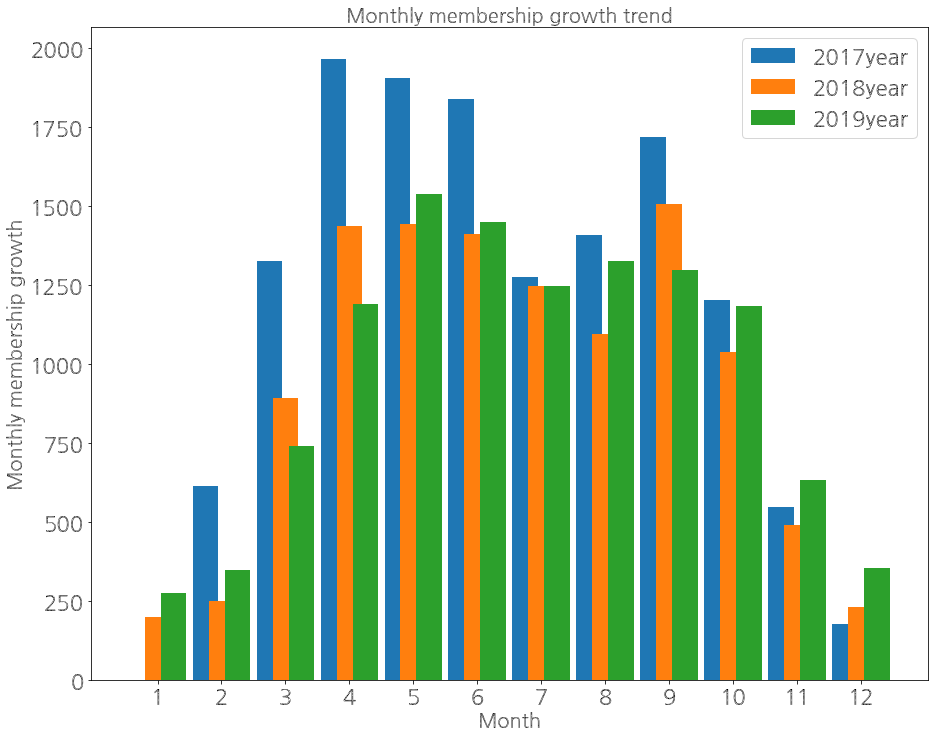

In [ ]:
# 월별 회원 증가 추이
plt.figure(figsize=(15, 12))
x = ["{}".format(i + 1) for i in range(12)]
y_a = increase_mem_17
y_b = increase_mem_18
y_c = increase_mem_19

plt.bar([i * 2 for i in range(len(x))], y_a, label='2017year')
plt.bar([i * 2 + 0.5 for i in range(len(x))], y_b, label='2018year')
plt.bar([i * 2 + 1 for i in range(len(x))], y_c, label='2019year')
plt.xticks([i * 2 + 0.5 for i in range(len(x))], x)

plt.xlabel('Month',fontsize=20)
plt.ylabel('Monthly membership growth',fontsize=20) # 월별 회원 증가수
plt.title('Monthly membership growth trend',fontsize=20)

plt.legend()
# plt.show()
plt.savefig('/content/drive/My Drive/compas/준수씨 자전거 자료/compas_final(code정리 진행중)/회원 이용 분석/Monthly membership growth trend')